<a href="https://colab.research.google.com/github/nvancha/DS_Hackathon-/blob/main/M2_Group4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**BLUF**
This is a small dataset with 918 entries and 11 predictors for Cardiovascular diseases (CVDs). Target is balanced but there are missing values and skewness problems need to be addressed. MaxHR and Oldpeak are the best predictors for CVDs based on the data. Sex and ExerciseAngina can be one-hot encoded. We should gather more data to increase the creditability of the analysis.

# Conclusion
**1. Describe the predictors by type (categorical, quant).**

* There are 11 predictors. 5 of them are categorical and 6 of them are quantitative.
* Categorical predictors include Sex, Chestpaintype, RestingECG, ExerciseAngina, and ST_Slope.
* Quantitative predictors include Age, RestingBP, Cholesterol, FastingBS, MaxHR, and Oldpeak.

**2. Identify the preprocessing needs of the dataset (e.g., corrections for missing values, duplicates, outliers, encodings, skewness, scaling, data imbalance, etc.)**

* There are 184 missing values in Cholesterol and 275 missing values in MaxHR. Since they are both quantitative predictors, possible solutions are using mean/median or imputing by using KNN or Deep learning.
* There is no duplicate.
* FastingBS and Oldpeak have significant skewness and need to be corrected. Possible solutions are truncating the outliers or scaling.  
* All predictors do not have issues of kurtosis as they are all greater than -2.
* Among all quantitative predictors, Oldpeak and MaxHR have a strong correlation with the target. MaxHR has a negative relationship while Oldpeak has a positive relationship. It is noteworthy that MaxHR has large missing values, so it is questionable whether it truly has a strong predictive power for heart disease.
* One-hot encoded can be done for Sex and ExerciseAngina.
* The data imbalance issue occurs with Sex, with male greater than 80% and female less than 20%.

**3. Provide appropriate visualizations and descriptive statistics, and comment on any noteworthy relationships/observations therein.**
From Sweetviz univariate graph, it is noteworthy that
* the dataset includes more male than female,
* cholesterol is bimodal,
* Oldpeak is right-skewed,
* highest chest pain type is ASY,
* 60% has normal RestingECG,
* MaxHR is approximately normal with a mean of 137,
* ST Slope includes 93% of either flat or up,
* and the data shows the target is balanced.


#**Business Problem**
Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help. The long-term goal is to develop an ML classifier fdor early detection of heart disease.

In this hackathon your task it to perform exploratory data analysis with a view to a) determining dataset preprocessing requirements that will allow development of a classifier, and b) developing insights about the dataset.


#**M2 Hackathon Checklist**

1. Describe the predictors by type (categorical, quant).
2. Identify the preprocessing needs of the dataset (e.g., corrections for missing values, duplicates, outliers, encodings, skewness, scaling, data imbalance, etc.)
3. Provide appropriate visualizations and descriptive statistics, and comment on any noteworthy relationships/observations therein.
4. Be sure to write a final BLUF that briefly summarizes the most important observations about your work in the M2 hackathon.

NOTE: you may use no-code, low-code, and code solutions in your response, with a requirement that at least 60% of the visualizations you present must be executed in code (i.e., no-code and low-code visualizations cannot exceed 40% of the total number of graphs offered).






#**Libraries**

In [ ]:
# Basic libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize
import scipy.stats as ss
import math
from matplotlib.colors import ListedColormap

In [ ]:
# sklearn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, log_loss, balanced_accuracy_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.inspection import partial_dependence
from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import permutation_importance

In [ ]:
# mblearn library
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_classification

#**Read Data**

#*Data Dictionary*

- Age: age of the patient [years]
- Sex: sex of the patient [M: Male, F: Female]
- ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
- RestingBP: resting blood pressure [mm Hg]
- Cholesterol: serum cholesterol [mm/dl]
- FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
- RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
- MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
- ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
- Oldpeak: oldpeak = ST [Numeric value measured in depression]
- ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
- HeartDisease: output class [1: heart disease, 0: Normal]


In [ ]:
# Read
# File: https://drive.google.com/file/d/1LGCaHL6MKf0vgQIQZ34xA2uUnInlSMNe/view?usp=share_link
url = 'https://drive.google.com/uc?id=1LGCaHL6MKf0vgQIQZ34xA2uUnInlSMNe'

# Read in the dataset
df = pd.read_csv(url, header = 0, index_col = 0)

In [ ]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289.0,0,Normal,172.0,N,0.0,Up,0
1,49,F,NAP,160,180.0,0,Normal,156.0,N,1.0,Flat,1
2,37,M,ATA,130,283.0,0,ST,98.0,N,0.0,Up,0
3,48,F,ASY,138,214.0,0,Normal,108.0,Y,1.5,Flat,1
4,54,M,NAP,150,195.0,0,Normal,NaN,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264.0,0,Normal,132.0,N,1.2,Flat,1
914,68,M,ASY,144,193.0,1,Normal,141.0,N,3.4,Flat,1
915,57,M,ASY,130,NaN,0,Normal,115.0,Y,1.2,Flat,1
916,57,F,ATA,130,236.0,0,LVH,174.0,N,0.0,Flat,1


In [ ]:
# Shape of DataFrame
print("\nSHAPE of df\n", df.shape)


SHAPE of df
 (918, 12)


#**Exploratory Data Analysis**
The M2 Hackathon starts here! Enjoy!

In [ ]:
# Checks
# Check data types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     734 non-null    float64
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           643 non-null    float64
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 93.2+ KB
None




Missing Values
 Age                 0
Sex                 0
ChestPainType       0
RestingBP           0
Cholesterol       184
FastingBS           0
RestingECG          0
MaxHR             275
ExerciseAngina      0
Oldpeak             0
ST_Slope            0
HeartDisease        0
dtype: int64


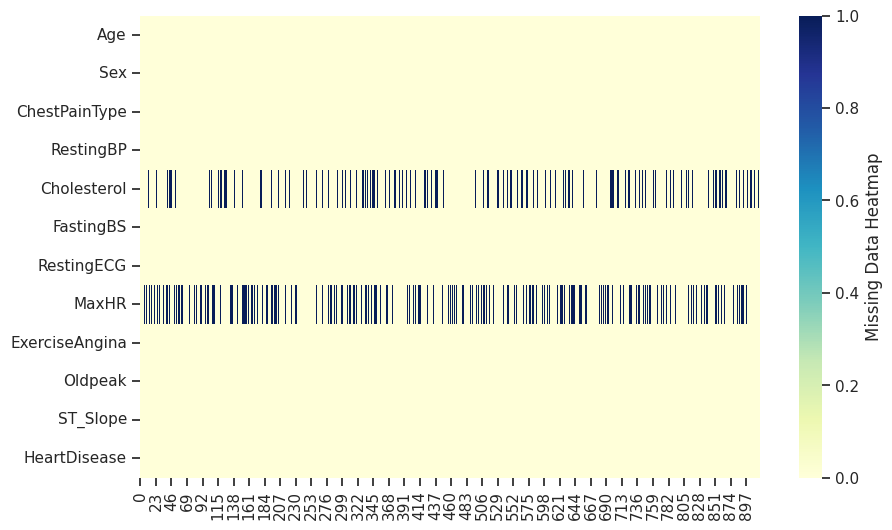

In [ ]:
# Check for missing values
print('\n\nMissing Values\n',df.isnull().sum(axis=0))

# Missing value heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data Heatmap'})
plt.show()

In [ ]:
# Check for duplicates
print('\n Duplicates\n',df.duplicated().sum())


 Duplicates
 0


In [ ]:
# Univariate descriptive statistics using pandas

# Ensure the maximum number of columns are displayed in pandas
pd.set_option('display.max_columns', None)

# Univariate numerical statistics using pandas .describe
print("UNIVARIATE DESCRIPTIVE STAT using pandas\n",df.describe(include='all').T)
print("\n SKEWNESS\n",df.skew())
print("\n FISHER'S KURTOSIS\n",df.kurt())

UNIVARIATE DESCRIPTIVE STAT using pandas
                 count unique     top freq        mean         std   min  \
Age             918.0    NaN     NaN  NaN   53.510893    9.432617  28.0   
Sex               918      2       M  725         NaN         NaN   NaN   
ChestPainType     918      4     ASY  496         NaN         NaN   NaN   
RestingBP       918.0    NaN     NaN  NaN  132.396514   18.514154   0.0   
Cholesterol     734.0    NaN     NaN  NaN  203.209809  109.418927   0.0   
FastingBS       918.0    NaN     NaN  NaN    0.233115    0.423046   0.0   
RestingECG        918      3  Normal  552         NaN         NaN   NaN   
MaxHR           643.0    NaN     NaN  NaN   136.51633   26.230721  60.0   
ExerciseAngina    918      2       N  547         NaN         NaN   NaN   
Oldpeak         918.0    NaN     NaN  NaN    0.887364     1.06657  -2.6   
ST_Slope          918      3    Flat  460         NaN         NaN   NaN   
HeartDisease    918.0    NaN     NaN  NaN    0.553377    0

<ipython-input-95-2aa23ab89fe4>:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print("\n SKEWNESS\n",df.skew())
<ipython-input-95-2aa23ab89fe4>:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print("\n FISHER'S KURTOSIS\n",df.kurt())


CORRELATION MATRIX
                    Age  RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak  \
Age           1.000000   0.254399    -0.091895   0.198039 -0.381966  0.258612   
RestingBP     0.254399   1.000000     0.097528   0.070193 -0.129568  0.164803   
Cholesterol  -0.091895   0.097528     1.000000  -0.260526  0.247805  0.074998   
FastingBS     0.198039   0.070193    -0.260526   1.000000 -0.117754  0.052698   
MaxHR        -0.381966  -0.129568     0.247805  -0.117754  1.000000 -0.158914   
Oldpeak       0.258612   0.164803     0.074998   0.052698 -0.158914  1.000000   
HeartDisease  0.282039   0.107589    -0.219841   0.267291 -0.427403  0.403951   

              HeartDisease  
Age               0.282039  
RestingBP         0.107589  
Cholesterol      -0.219841  
FastingBS         0.267291  
MaxHR            -0.427403  
Oldpeak           0.403951  
HeartDisease      1.000000  





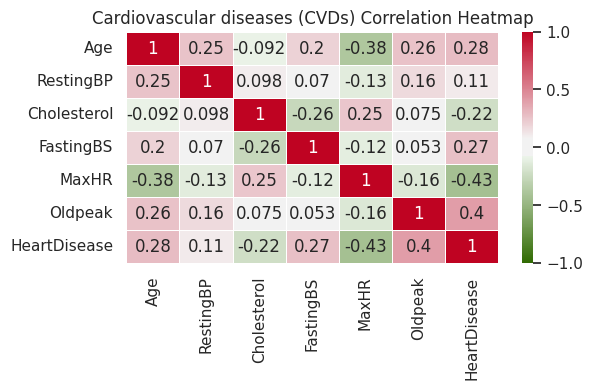



COVARIANCE MATRIX
                     Age   RestingBP   Cholesterol  FastingBS       MaxHR  \
Age           88.974254   44.427519    -94.789157   0.790260  -96.302726   
RestingBP     44.427519  342.773903    193.780983   0.549778  -65.487265   
Cholesterol  -94.789157  193.780983  11972.501623 -11.908074  713.820167   
FastingBS      0.790260    0.549778    -11.908074   0.178968   -1.294991   
MaxHR        -96.302726  -65.487265    713.820167  -1.294991  688.050745   
Oldpeak        2.601774    3.254307      8.872588   0.023778   -4.503723   
HeartDisease   1.323300    0.990808    -11.977562   0.056246   -5.562971   

               Oldpeak  HeartDisease  
Age           2.601774      1.323300  
RestingBP     3.254307      0.990808  
Cholesterol   8.872588    -11.977562  
FastingBS     0.023778      0.056246  
MaxHR        -4.503723     -5.562971  
Oldpeak       1.137572      0.214307  
HeartDisease  0.214307      0.247420  





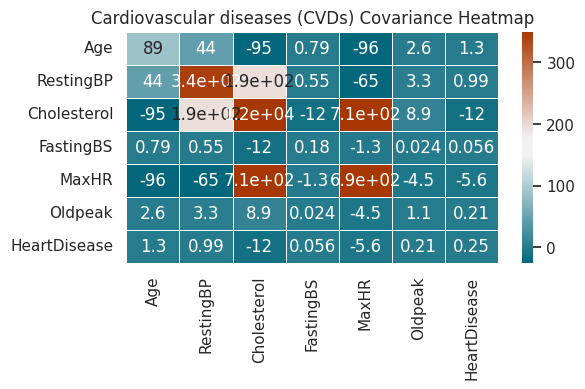

In [ ]:
#Correlation Matrix
print("CORRELATION MATRIX\n",df.corr(method='pearson', min_periods=1))
print("\n\n")

#Correlation Matrix as a Heatmap
sns.set_style('darkgrid')
plt.figure(figsize = (6,3))
cmap = sns.diverging_palette(120, 10, l = 40, s = 99, sep = 20, center = 'light', as_cmap = True)
sns.heatmap((df).corr(), vmin = -1, vmax = 1, annot = True, cmap = cmap, lw = .5, linecolor = 'white')
plt.title("Cardiovascular diseases (CVDs) Correlation Heatmap")
plt.show()

# Covariance Matrix
print("\n\nCOVARIANCE MATRIX\n",df.cov())
print("\n\n")

#Covariance Matrix as a Heatmap
sns.set_style('darkgrid')
plt.figure(figsize = (6,3))
cmap = sns.diverging_palette(220, 20, l = 40, s = 99, sep = 20, center = 'light', as_cmap = True)
sns.heatmap((df).cov(), vmin = -25, vmax = 350, annot = True, cmap = cmap, lw = .5, linecolor = 'white')
plt.title("Cardiovascular diseases (CVDs) Covariance Heatmap")
plt.show()

<ipython-input-97-f6dbfe72d766>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(  x="MaxHR", data=df,palette="light:m_r",
<ipython-input-97-f6dbfe72d766>:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(  x="Oldpeak", data=df,palette="light:m_r",


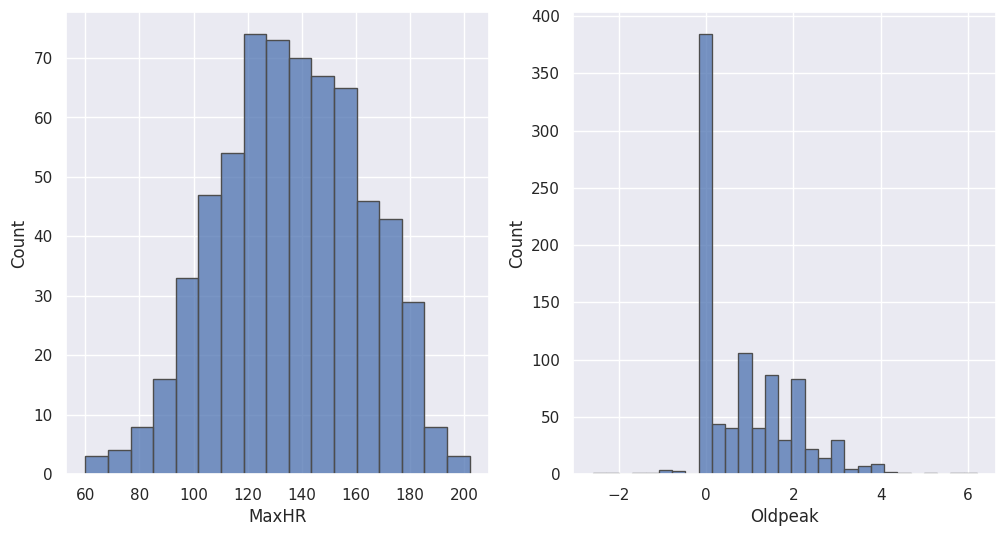

In [ ]:
# Univariate Histograms

plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.histplot(  x="MaxHR", data=df,palette="light:m_r",
    edgecolor=".3")
plt.subplot(1,2,2)
sns.histplot(  x="Oldpeak", data=df,palette="light:m_r",
    edgecolor=".3")
plt.show()

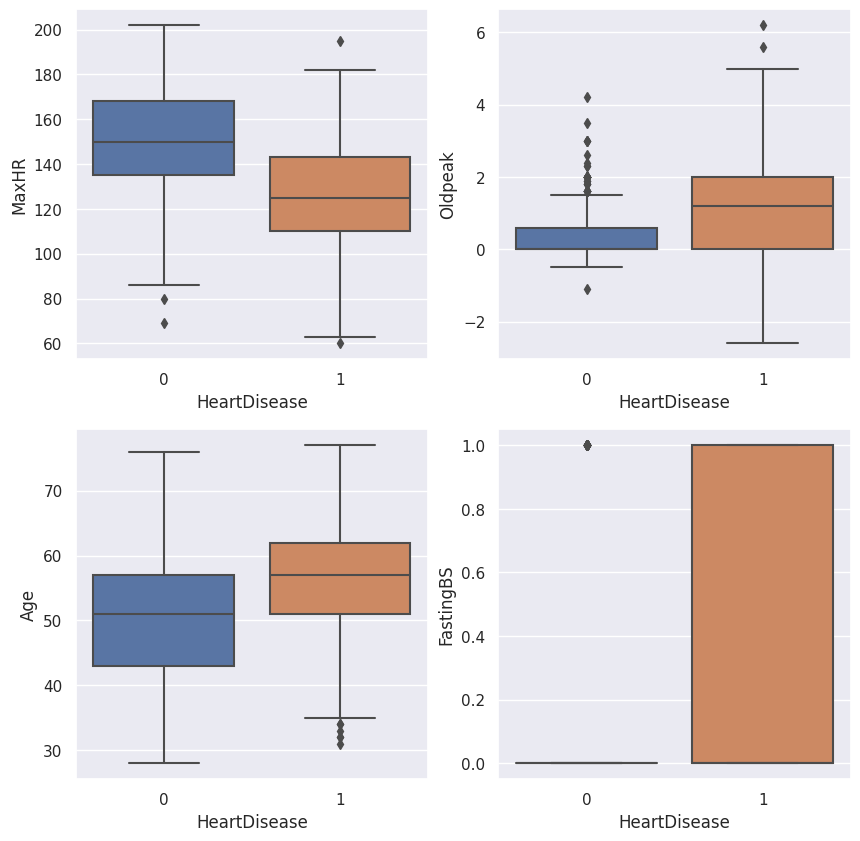

In [ ]:
# Bivariate Graphical Descriptive Statistics
# Side-by-side Boxplots

fig, axes = plt.subplots(2, 2, figsize=(10,10))
sns.boxplot(  y="MaxHR", x= "HeartDisease", data=df,  orient='v' , ax=axes[0, 0])
sns.boxplot(  y="Oldpeak", x= "HeartDisease", data=df,  orient='v' , ax=axes[0, 1])
sns.boxplot(  y="Age", x= "HeartDisease", data=df,  orient='v' , ax=axes[1, 0])
sns.boxplot(  y="FastingBS", x= "HeartDisease", data=df,  orient='v' , ax=axes[1, 1])
plt.show()

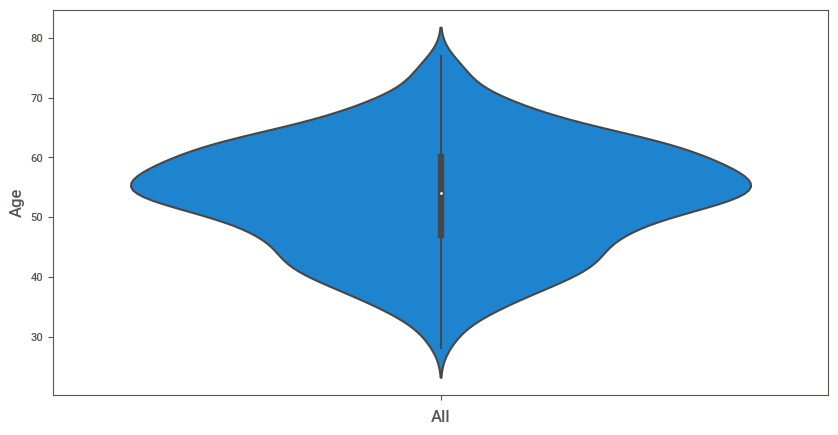

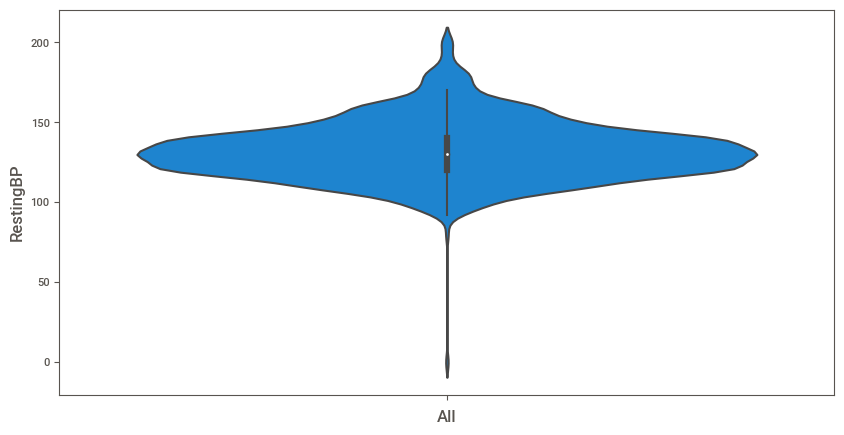

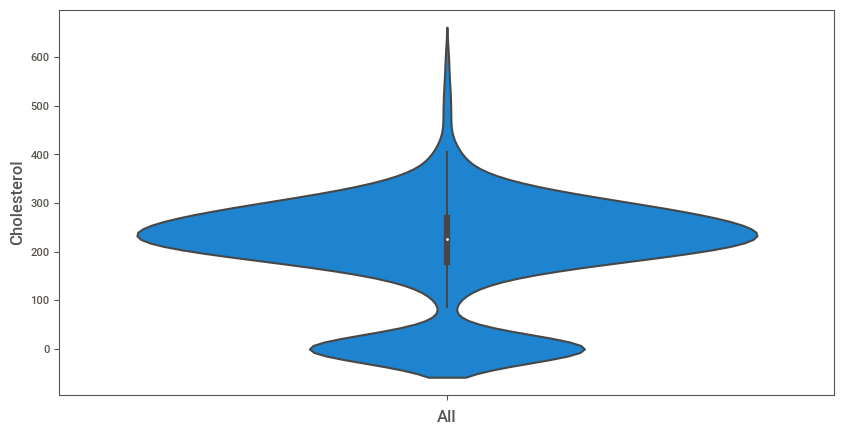

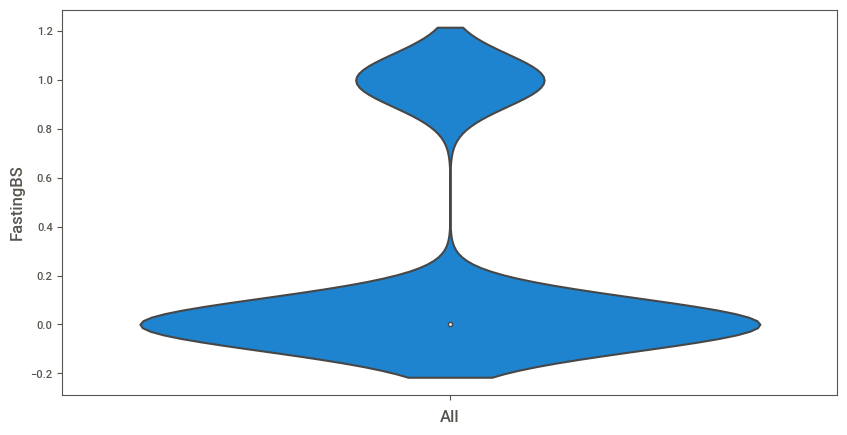

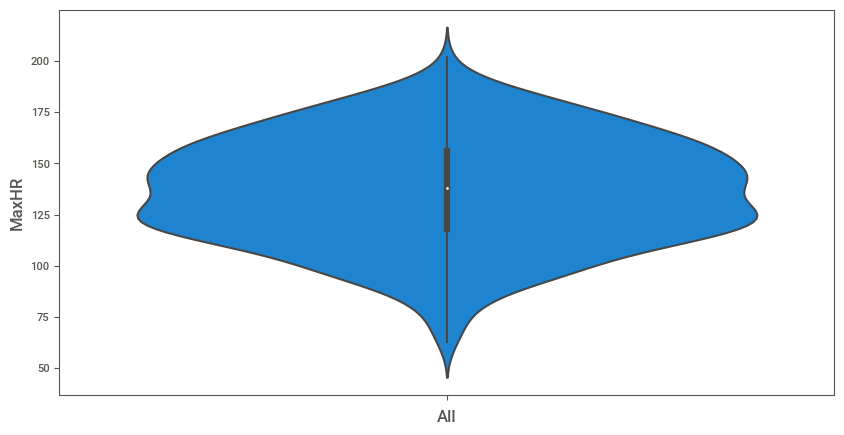

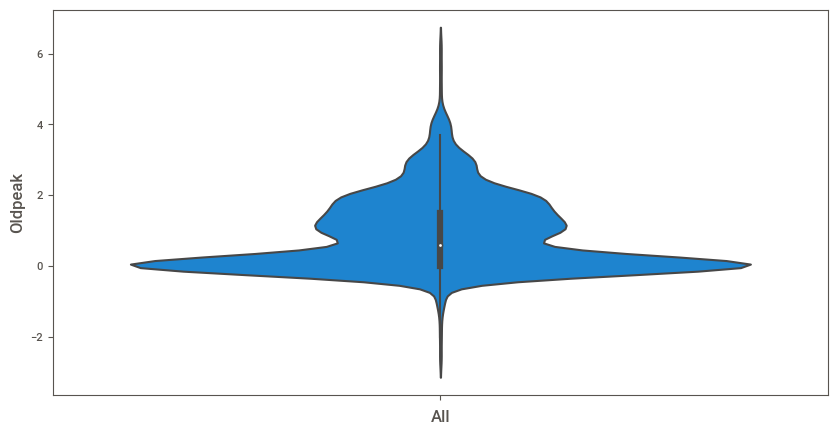

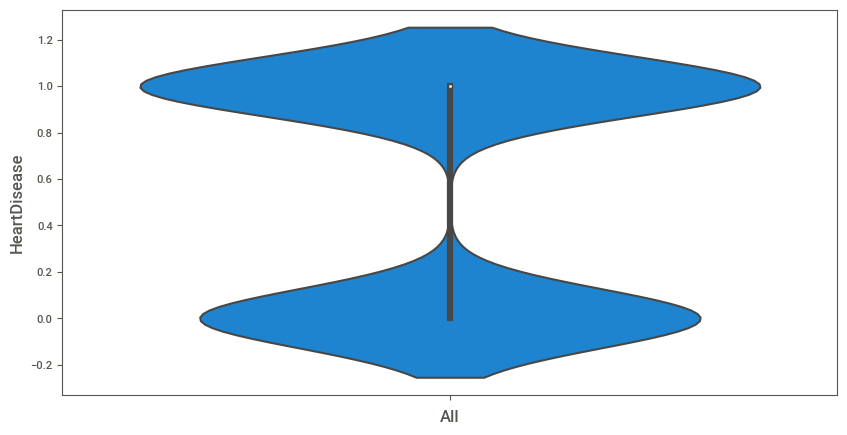

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289.0,0,Normal,172.0,N,0.0,Up,0
1,49,F,NAP,160,180.0,0,Normal,156.0,N,1.0,Flat,1
2,37,M,ATA,130,283.0,0,ST,98.0,N,0.0,Up,0
3,48,F,ASY,138,214.0,0,Normal,108.0,Y,1.5,Flat,1
4,54,M,NAP,150,195.0,0,Normal,NaN,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264.0,0,Normal,132.0,N,1.2,Flat,1
914,68,M,ASY,144,193.0,1,Normal,141.0,N,3.4,Flat,1
915,57,M,ASY,130,NaN,0,Normal,115.0,Y,1.2,Flat,1
916,57,F,ATA,130,236.0,0,LVH,174.0,N,0.0,Flat,1


In [ ]:
# Violinplots for quant variables
df["All"] = ""
for i in df.columns:
  if df.dtypes[i] == 'int64' or df.dtypes[i] == 'float64':
    plt.figure(figsize = (10,5))
    sns.violinplot(x = 'All',y = i, data = df)
    plt.show()
df.drop('All',axis=1)

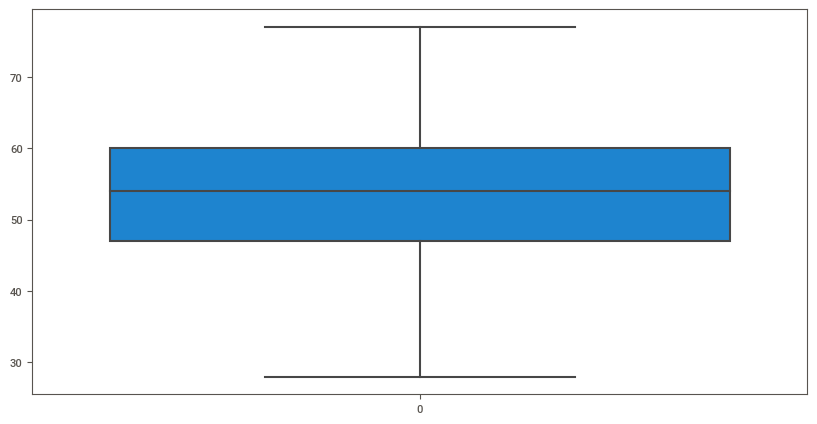

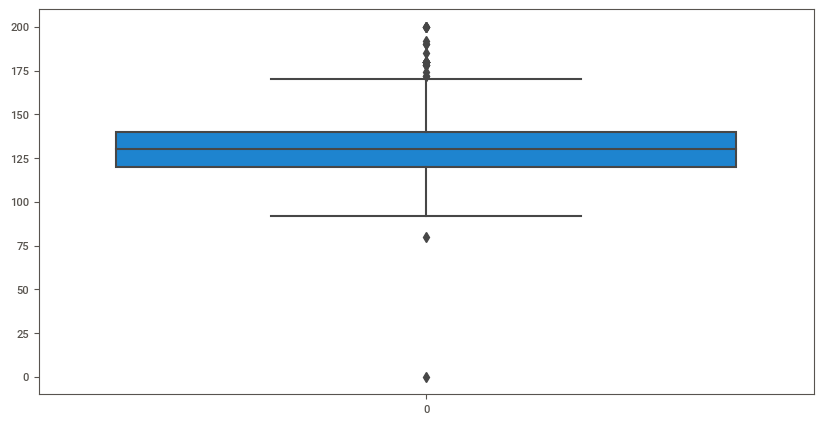

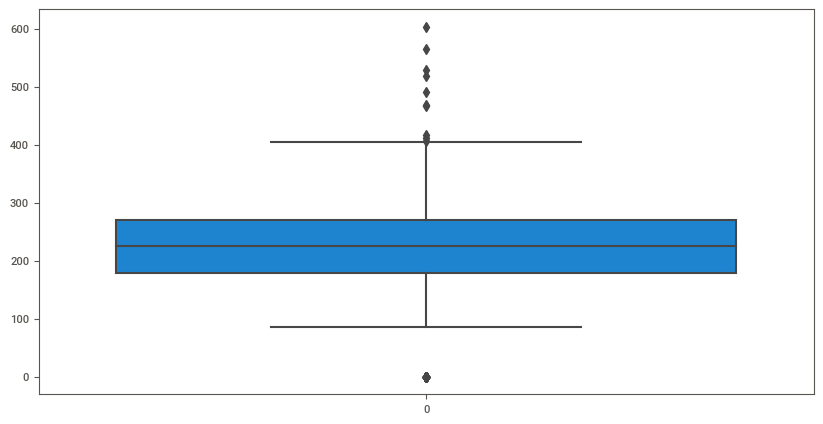

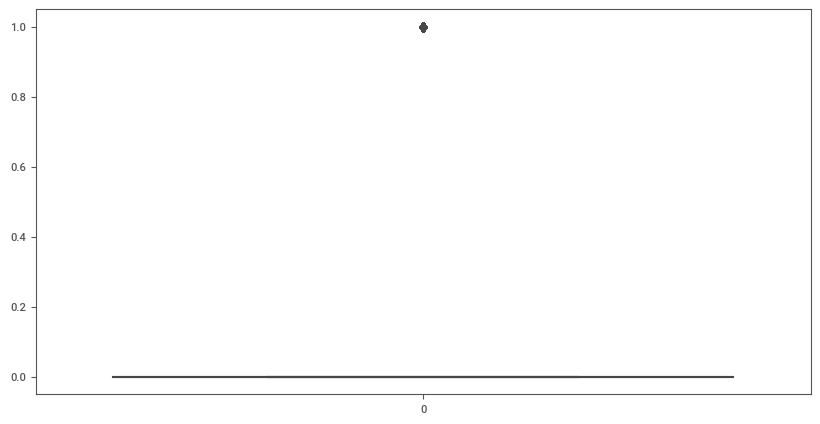

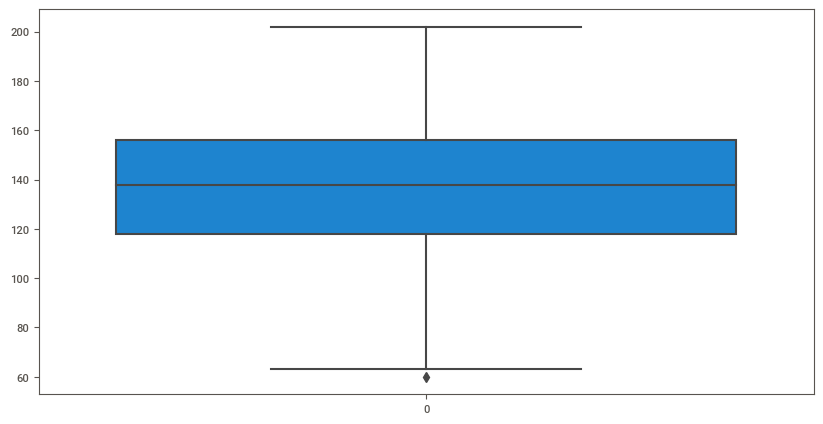

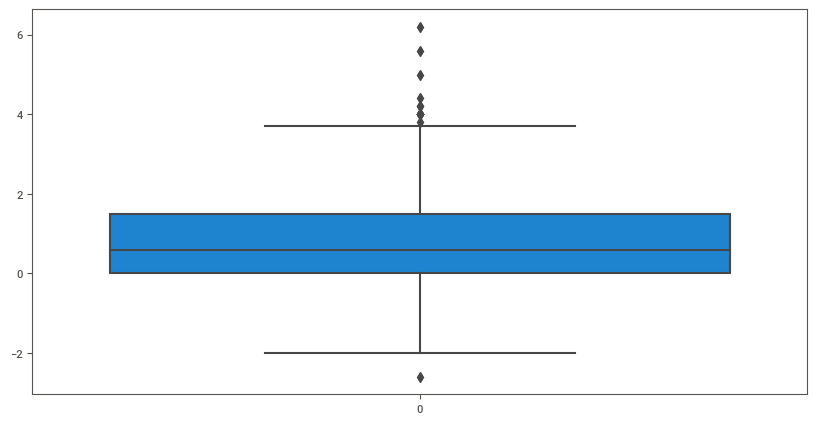

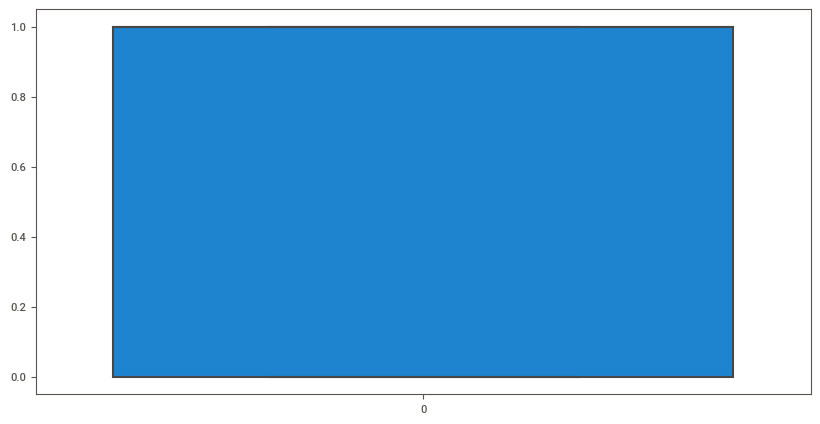

In [ ]:
# Outlier detection in quant varianbles
for i in df.columns:
  if df.dtypes[i] == 'int64' or df.dtypes[i] == 'float64':
    plt.figure(figsize = (10,5))
    sns.boxplot(df[i])
    plt.show()

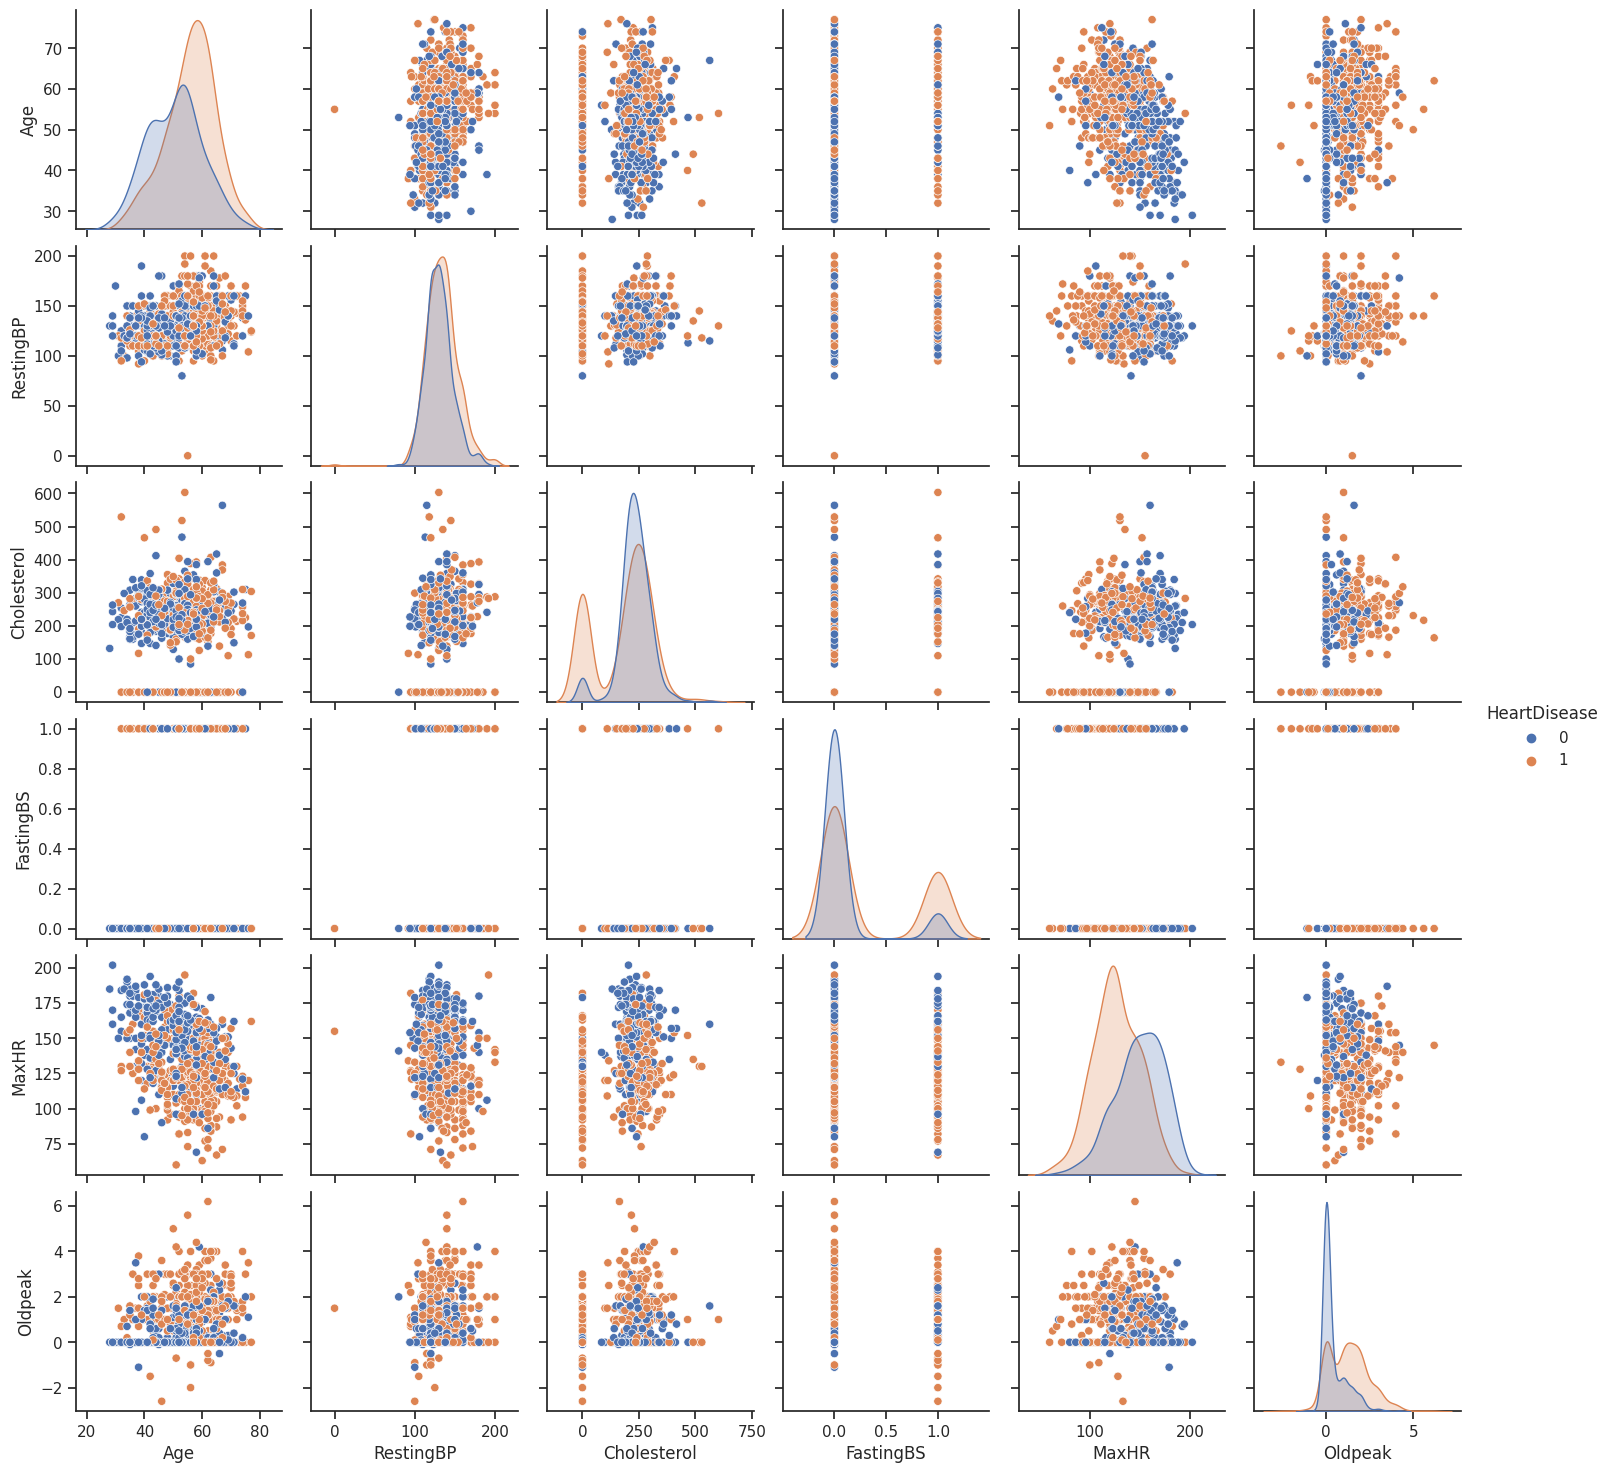

In [ ]:
# Pairplot
sns.set_theme(style="ticks")
sns.pairplot(df, hue="HeartDisease")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


                                             |          | [  0%]   00:00 -> (? left)


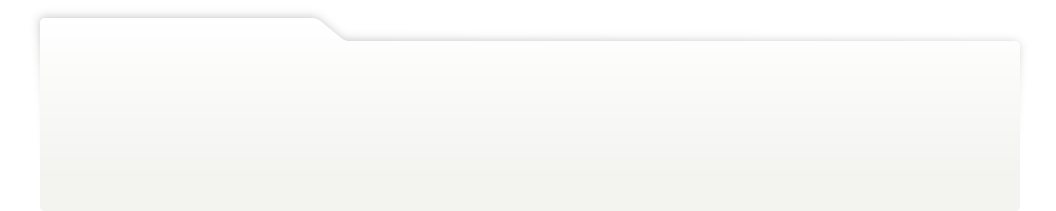
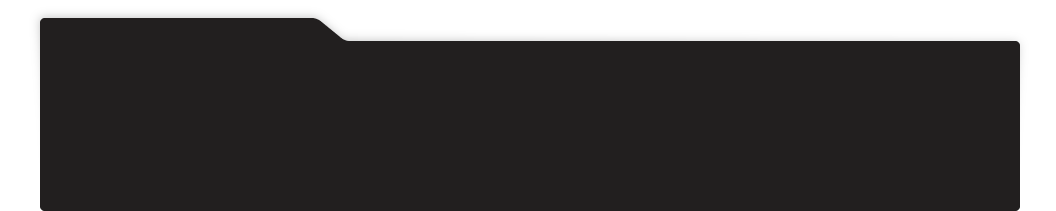
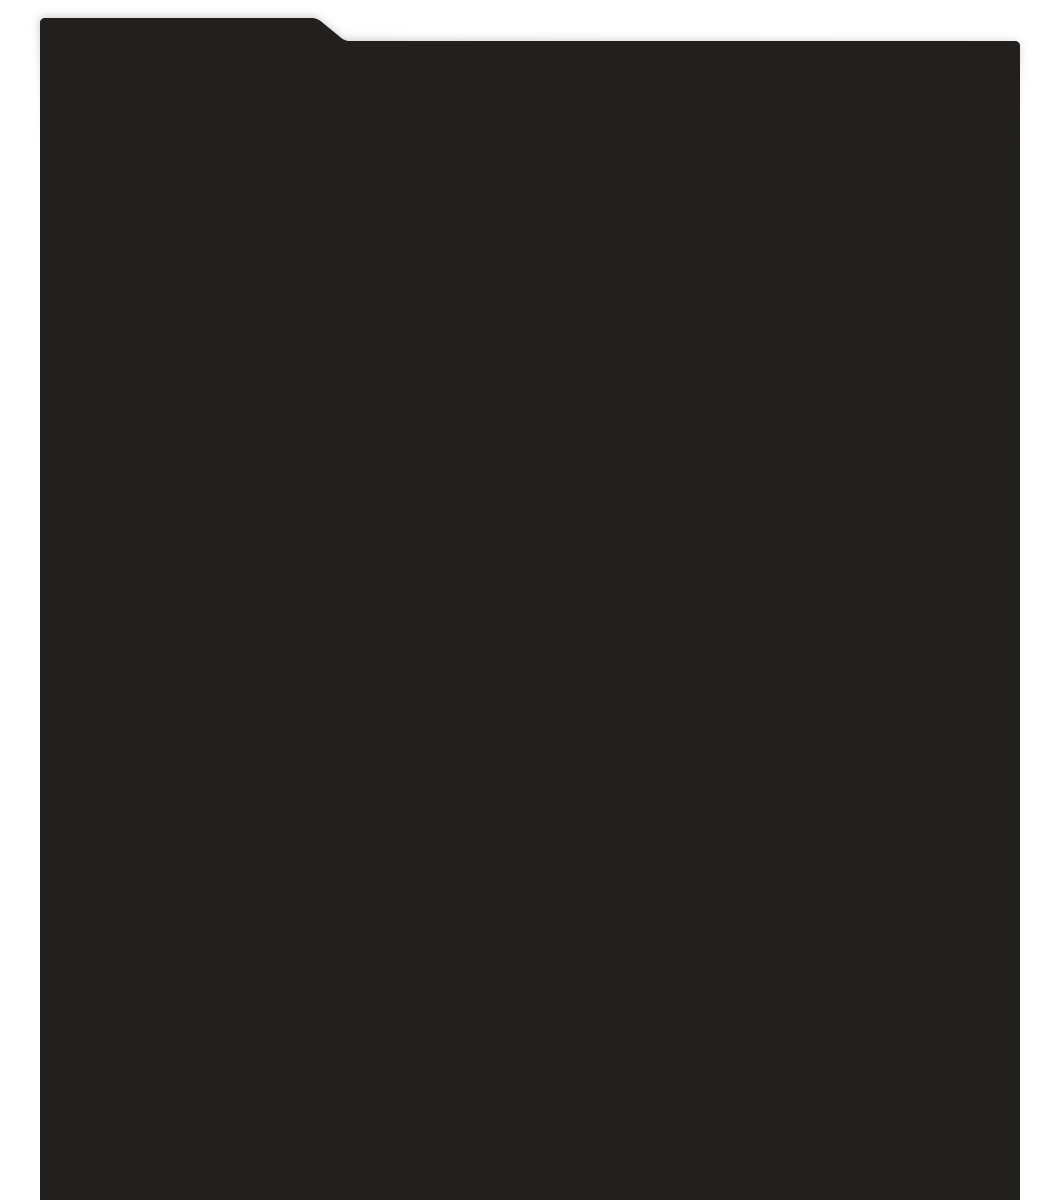
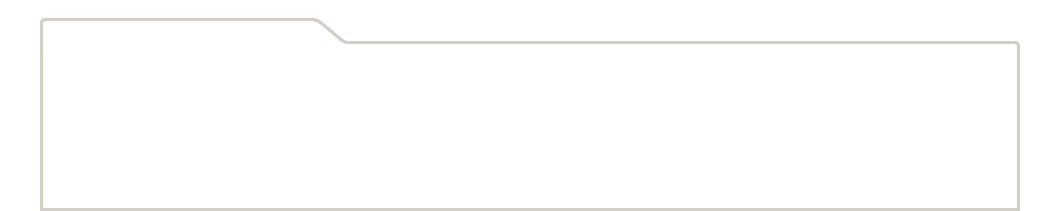
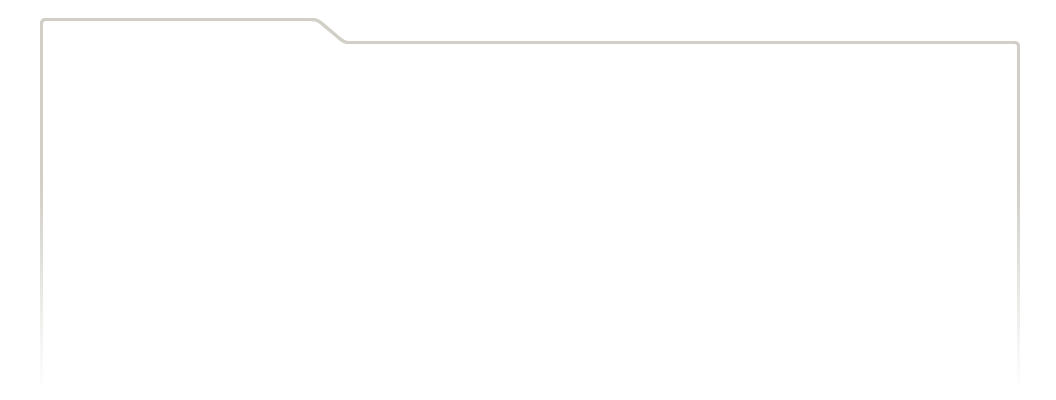
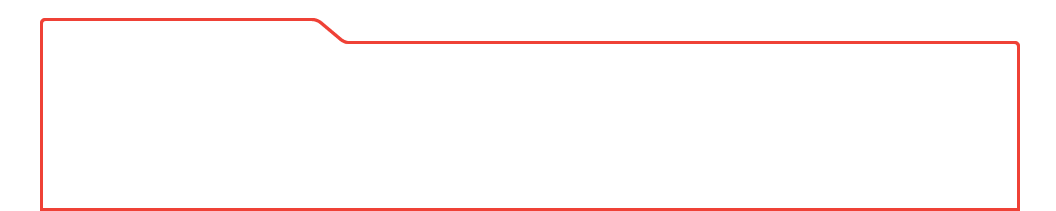
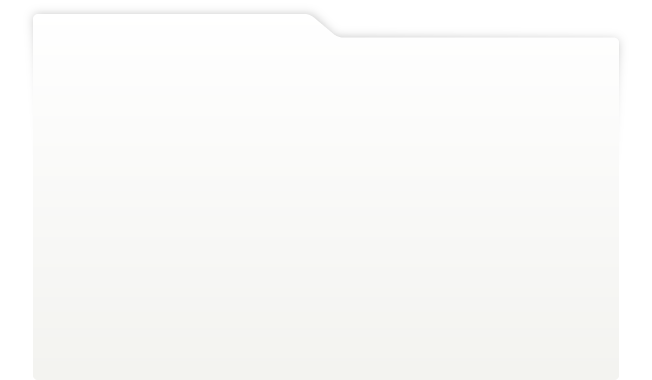
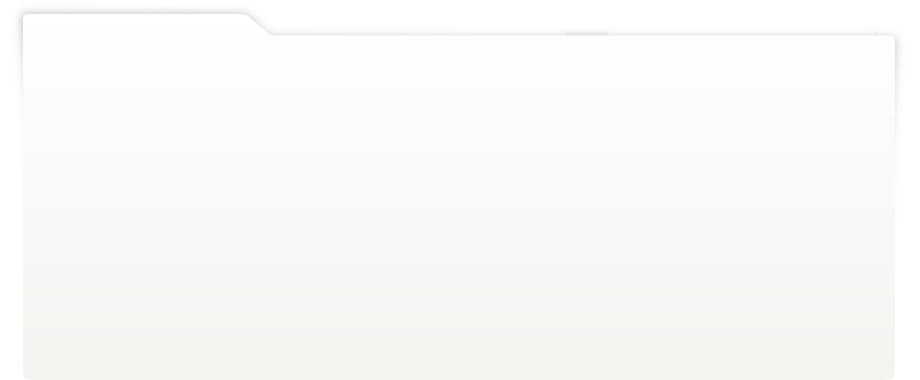
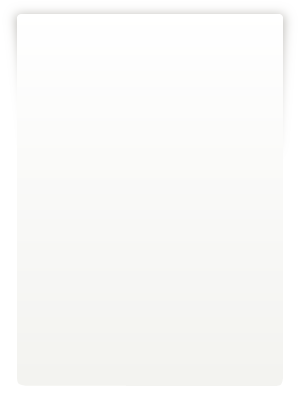
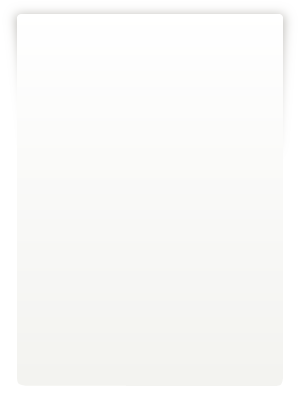
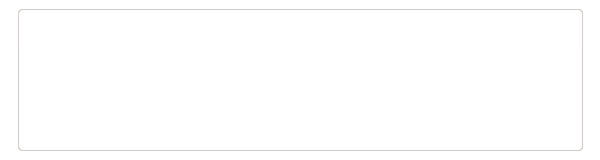
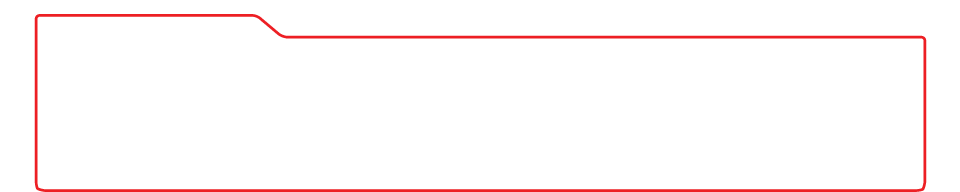
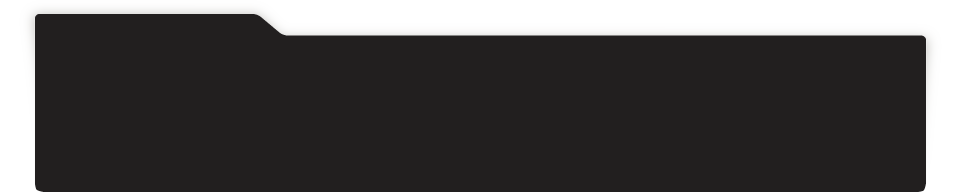
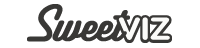
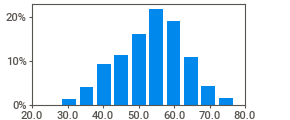
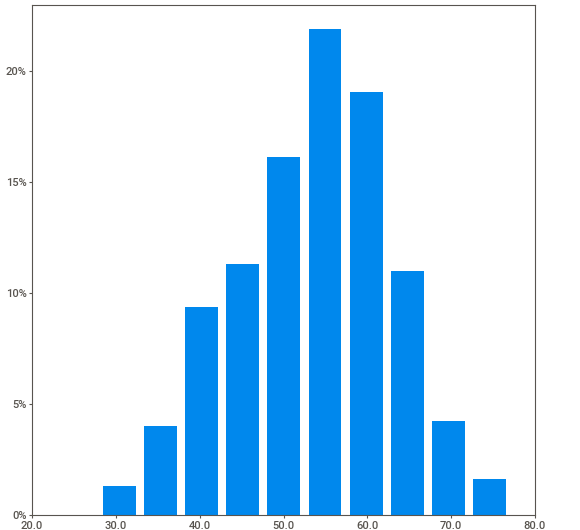
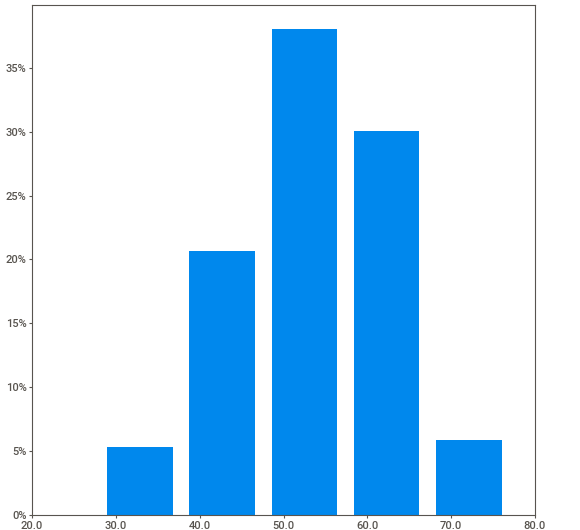
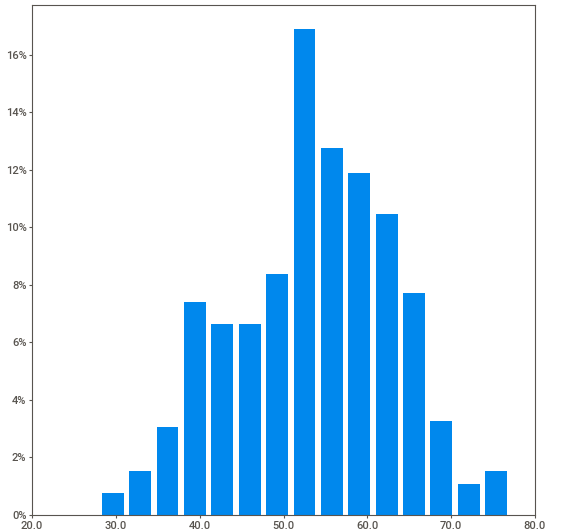
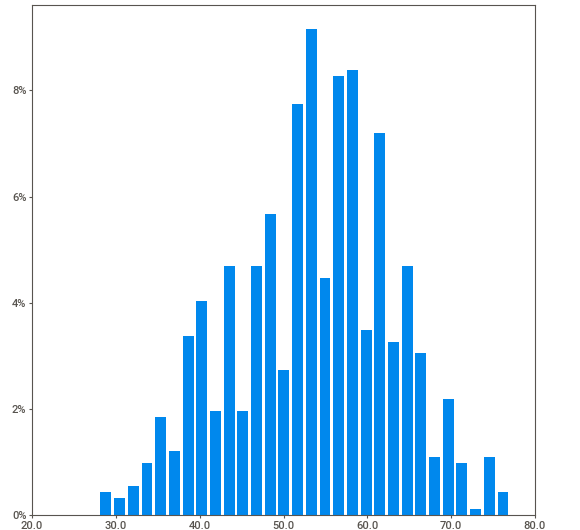
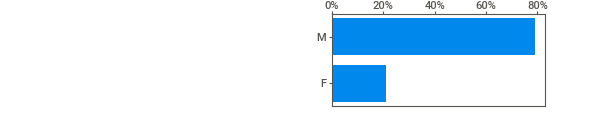
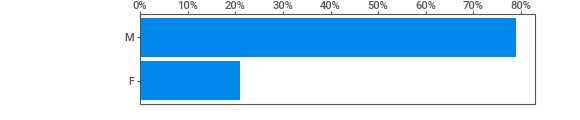
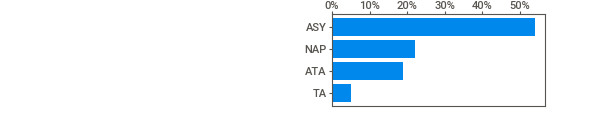
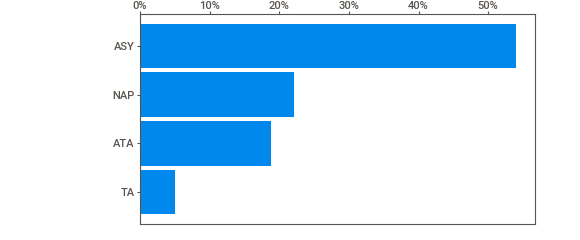
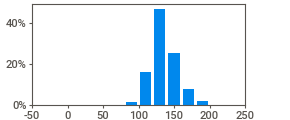
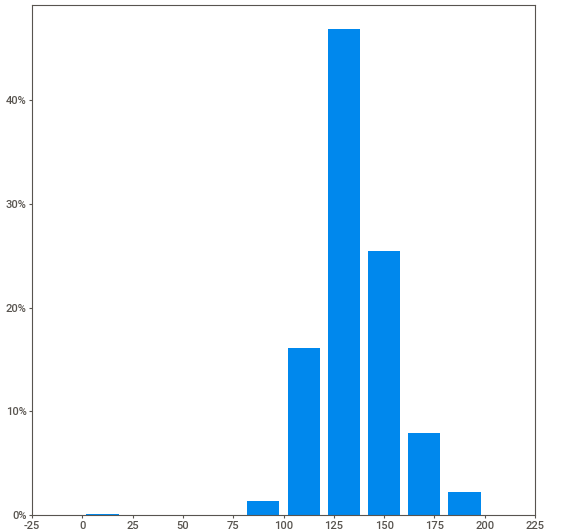
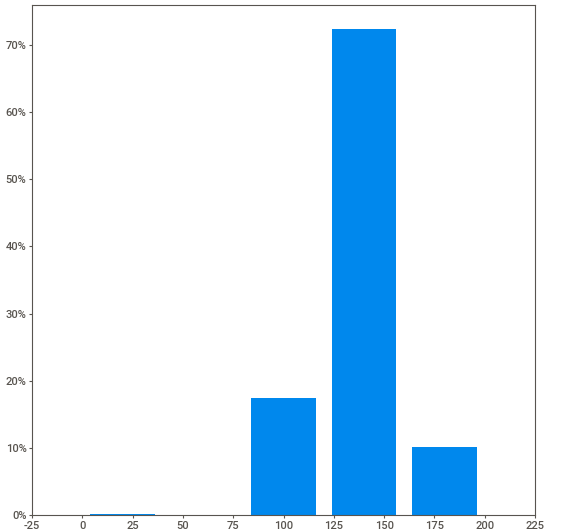
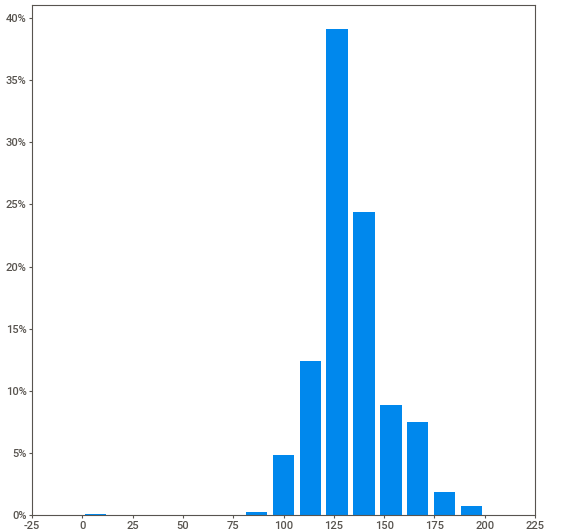
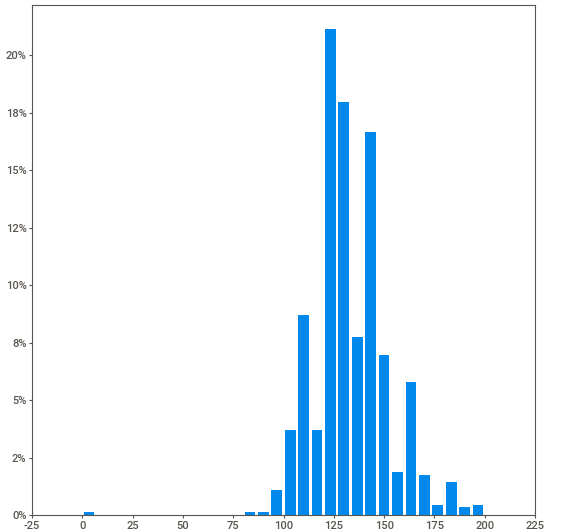
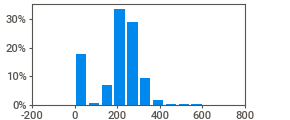
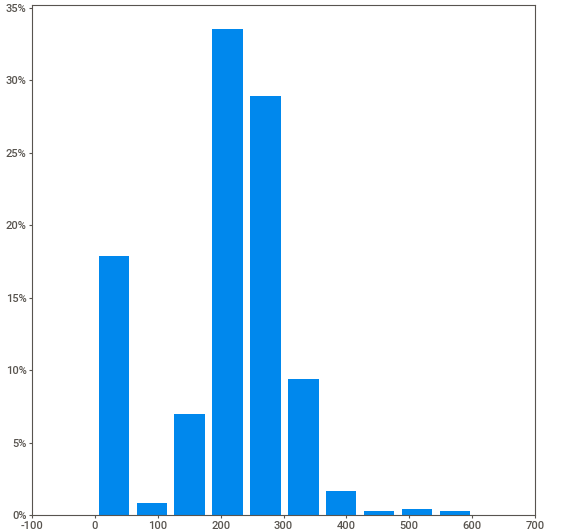
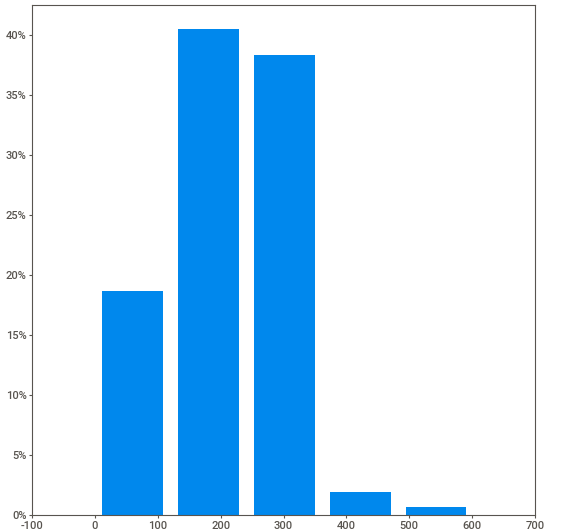
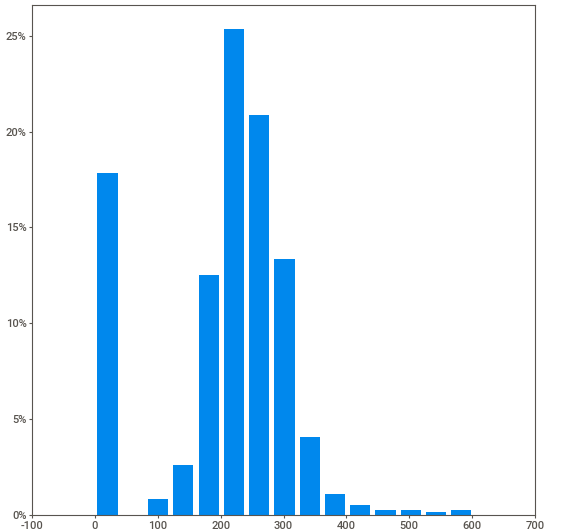
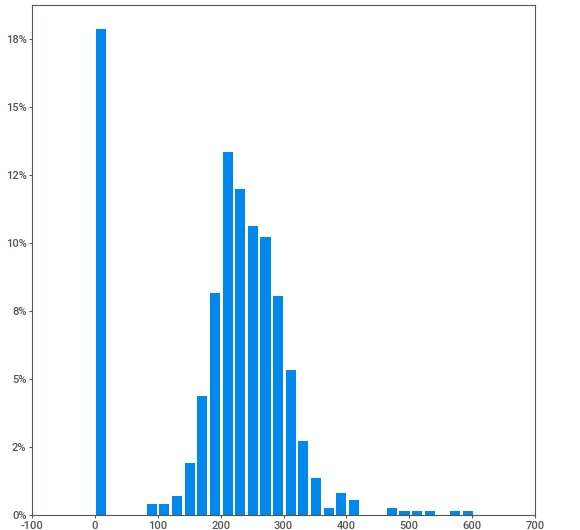
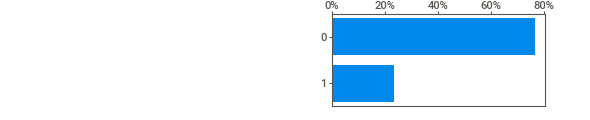
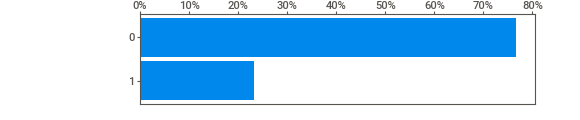
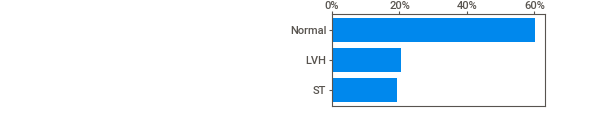
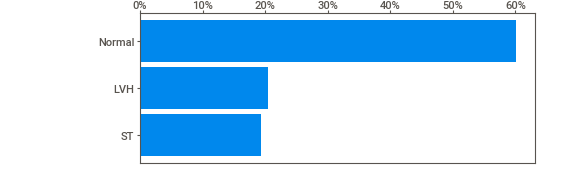
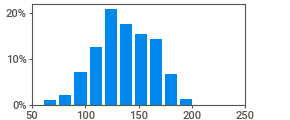
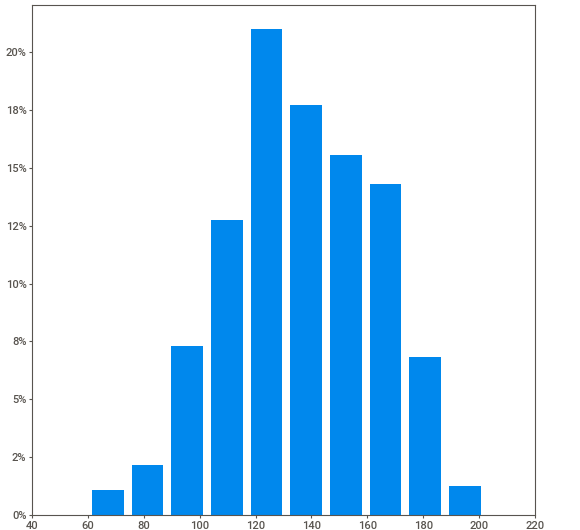
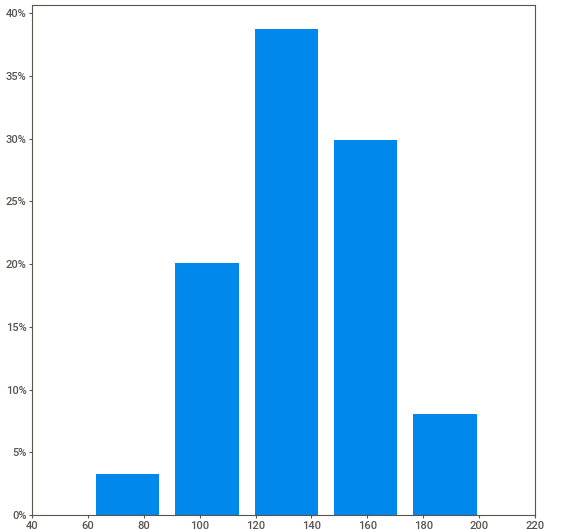
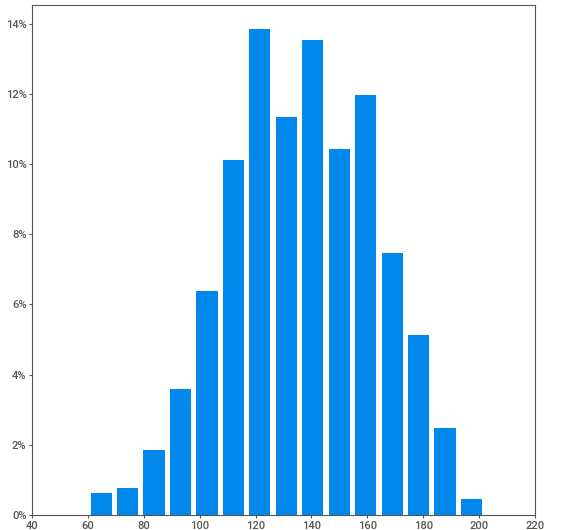
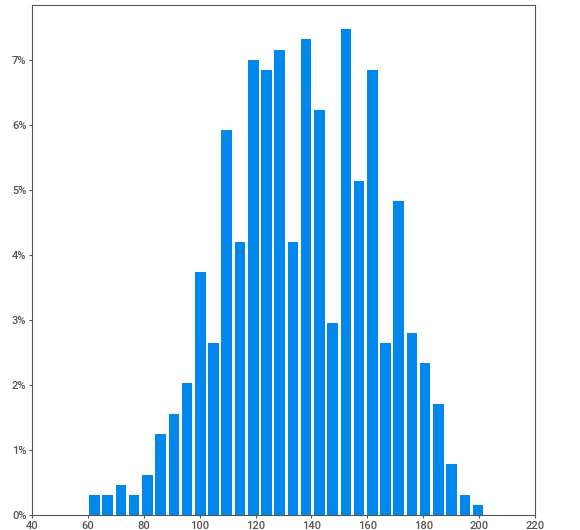
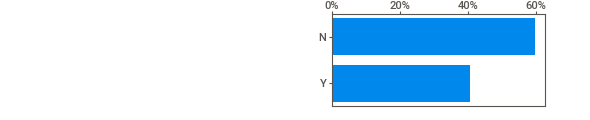
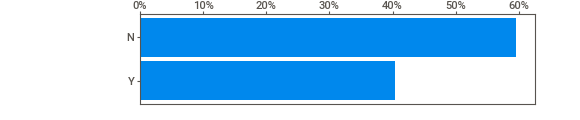
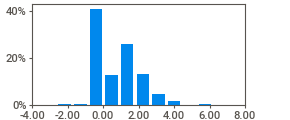
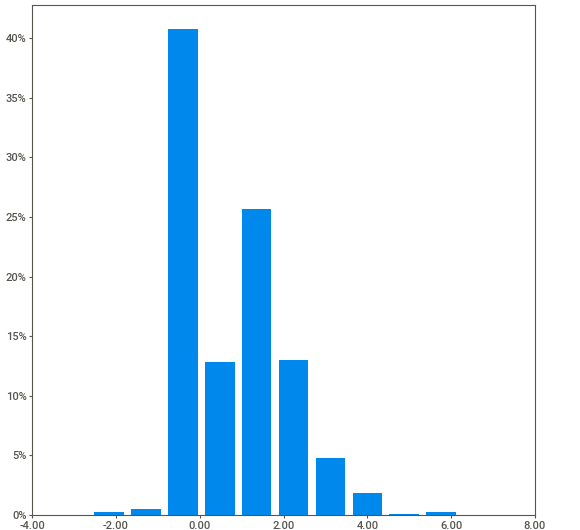
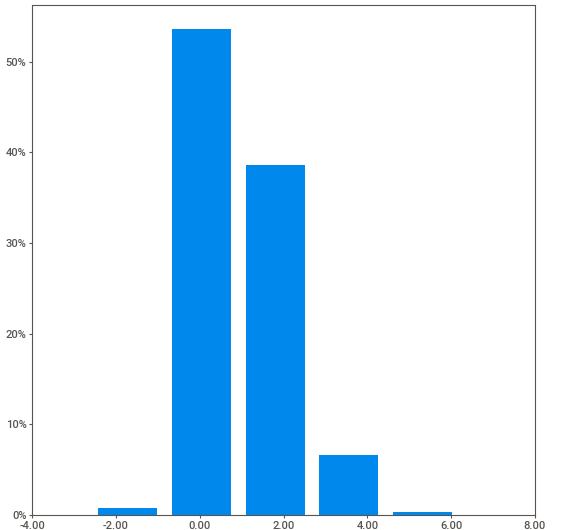
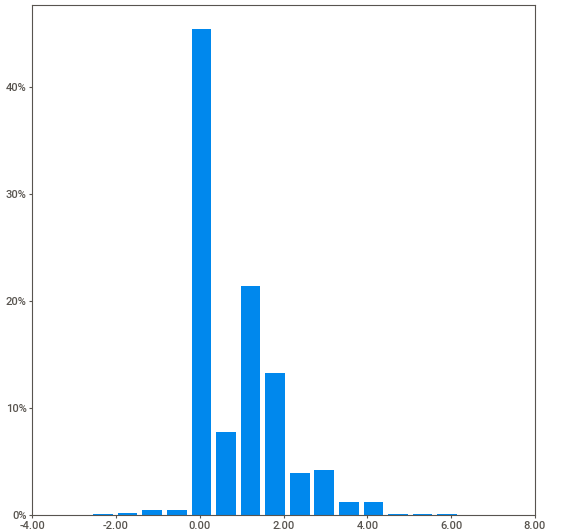
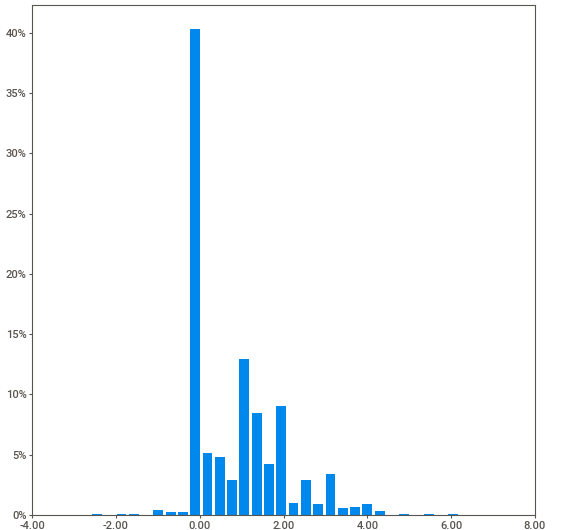
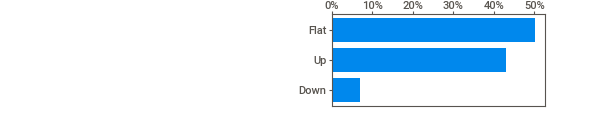
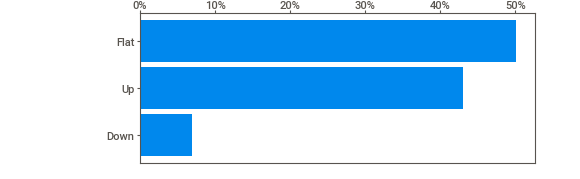
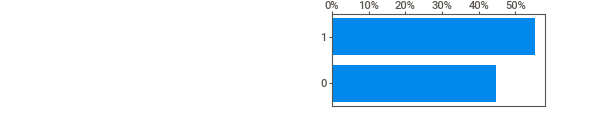
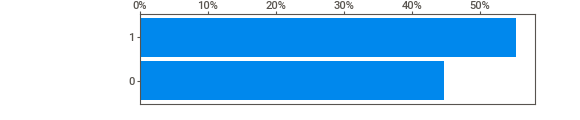
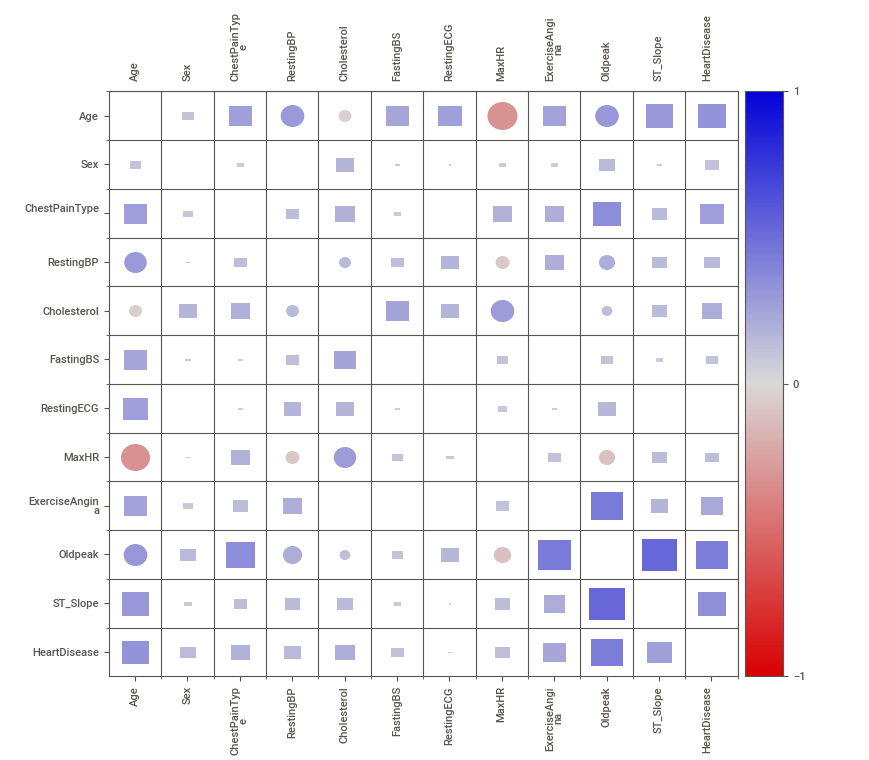
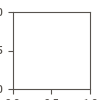

In [ ]:
!pip install sweetviz
import sweetviz as sv
vizreport = sv.analyze(df)
vizreport.show_notebook(layout='widescreen', w=1500, h=300, scale=0.7) #widescreen layout
#vizreport.show_notebook(layout='vertical', w=800, h=300, scale=0.7)   #vertical layout